# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Salsabila Selavieamanda Adyarta
- **Email:** 15220012@nusamandiri.ac.id
- **ID Dicoding:** salsabilaalavie

## Pertanyaan Bisnis

1. Bagaimana perusahaan dapat menyesuaikan strategi pemasarannya untuk meningkatkan peminjaman sepeda pada musim yang menunjukkan angka rendah?
2. Bagaimana perbandingan penyewaan sepeda antara hari libur dan hari kerja?
3. Apakah ada perbedaan jumlah peminjam sepeda berdasarkan situasi cuaca?



## Import Library & File directory

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
#Membaca Dataset Day
day = "/content/drive/MyDrive/Dataset/day.csv"
day_df = pd.read_csv(day)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
#Membaca Dataset Hour
hour = "/content/drive/MyDrive/Dataset/hour.csv"
hour_df = pd.read_csv(hour)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
#Menggabungkan Dua Dataframe
Bike_df = pd.merge(
    left=day_df,
    right=hour_df,
    how='inner',
    left_on='dteday',
    right_on='dteday'
)

Bike_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Pada tahap ini dua dataframe digabung menggunakan Inner join agar hanya menyertakan baris yang memiliki kecocokan di kedua dataset, lalu diberi nama Bike_df

### Assessing Data

In [9]:
#Pencarian Missing Value
Bike_df.isnull().sum()

,0
instant_x,0
dteday,0
season_x,0
yr_x,0
mnth_x,0
holiday_x,0
weekday_x,0
workingday_x,0
weathersit_x,0
temp_x,0


Data tidak memiliki missing value

In [10]:
#Pencarian Duplikasi Data
print("Jumlah duplikasi: ", Bike_df.duplicated().sum())

Jumlah duplikasi:  0


Data tidak memiliki Missing Value maupun Duplikasi Data

### Cleaning Data

In [11]:
#Menghapus dua kolom berulang
columns_to_drop = ['instant_x', 'instant_y']
Bike_df = Bike_df.drop(columns=columns_to_drop)

Kedua kolom tersebut memberikan informasi yang sama, yaitu indeks baris. Setelah penggabungan dataset, tidak ada kebutuhan untuk menyimpan dua versi dari indeks yang sama.

## Exploratory Data Analysis (EDA)

In [ ]:
Bike_df.describe(include="all")

,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,atemp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,0.475775,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,0.162426,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.338363,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,0.490122,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.610488,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Menampilkan rangkuman dataframe setelah penghapusan dua kolom

In [ ]:
#Mengelompokkan data berdasarkan musim dan menghitung rata-rata peminjaman
season_group = Bike_df.groupby('season_x')['cnt_x'].mean().reset_index()
season_group.columns = ['season', 'average_count']
print(season_group)

   season  average_count
0       1    2635.348185
1       2    4995.253119
2       3    5654.093194
3       4    4765.366021


In [ ]:
#Mengelompokkan data berdasarkan situasi cuaca
weather_group = Bike_df.groupby('weathersit_x')['cnt_x'].mean().reset_index()
weather_group.columns = ['weather', 'average_count']
print(weather_group)

   weather  average_count
0        1    4895.177083
1        2    4062.717595
2        3    1914.700855


In [ ]:
#Mengelompokkan data berdasarkan hari kerja
workingday_group = Bike_df.groupby('workingday_x')['cnt_x'].mean().reset_index()
workingday_group.columns = ['workingday', 'average_count']
print(workingday_group)

   workingday  average_count
0           0    4341.834059
1           1    4622.855204


In [ ]:
#Menghitung korelasi variabel situasi cuaca dengan hari kerja
correlation = Bike_df[['weathersit_x', 'workingday_x', 'cnt_y']].corr()
print(correlation)

              weathersit_x  workingday_x     cnt_y
weathersit_x      1.000000      0.057122 -0.127413
workingday_x      0.057122      1.000000  0.030284
cnt_y            -0.127413      0.030284  1.000000


Dengan hasil mendekati 0, menunjukkan bahwa situasi cuaca tidak mempengaruhi apakah hari tersebut dianggap sebagai hari kerja atau tidak

In [ ]:
#Menghitung korelasi variabel situasi cuaca dengan musim
correlation = Bike_df[['weathersit_x', 'season_x', 'cnt_y']].corr()
print(correlation)

              weathersit_x  season_x     cnt_y
weathersit_x      1.000000       NaN -0.127413
season_x               NaN       NaN       NaN
cnt_y            -0.127413       NaN  1.000000


Nilai NaN di sini menunjukkan bahwa tidak ada informasi yang dapat dihitung

In [ ]:
#Menghitung korelasi variabel musim dengan hari kerja
correlation = Bike_df[['season_x', 'workingday_x', 'cnt_y']].corr()
print(correlation)

              season_x  workingday_x     cnt_y
season_x           NaN           NaN       NaN
workingday_x       NaN      1.000000  0.030284
cnt_y              NaN      0.030284  1.000000


Nilai NaN menunjukkan bahwa tidak ada informasi yang dapat dihitung. Ini bisa berarti bahwa tidak ada cukup data atau variabel tersebut tidak relevan untuk analisis korelasi

## Visualization & Explanatory Analysis

### 1. Bagaimana perusahaan dapat menyesuaikan strategi pemasarannya untuk meningkatkan peminjaman sepeda pada musim yang menunjukkan angka peminjaman rendah?

<ipython-input-201-5087a493f6da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='average_count', data=season_group, palette='Set2', legend=False)


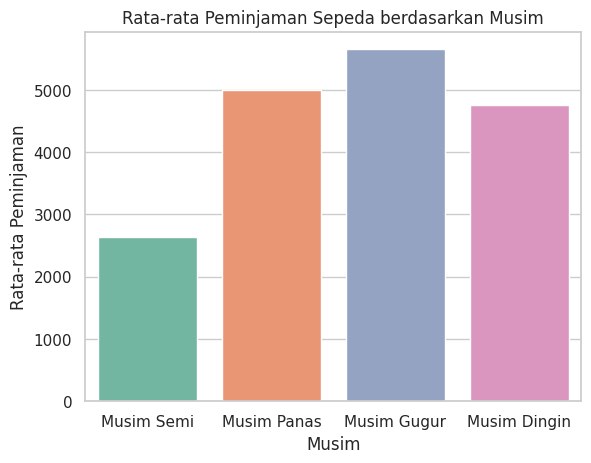

In [ ]:
#Visualisasi rata-rata peminjaman berdasarkan musim agar dapat menjawab pertanyaan 1
sns.barplot(x='season', y='average_count', data=season_group, palette='Set2', legend=False)
plt.title('Rata-rata Peminjaman Sepeda berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Peminjaman')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.show()

Grafik berikut menunjukkan rata-rata peminjaman berdasarkan musim. Dapat dilihat dari grafik tersebut bahwa musim gugur memiliki peminjaman tertinggi dibandingkan dengan musim lainnya. Grafik ini dapat membantu menjawab pertanyaan no.1 dalam menentukan keputusan strategi bisnis

### 2. Bagaimana perbandingan penyewaan sepeda antara hari libur dan hari kerja?

<ipython-input-217-6e27ea224256>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


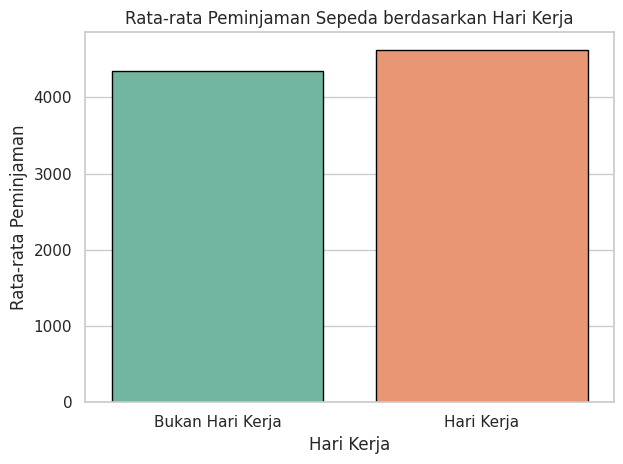

In [ ]:
#Visualisasi rata-rata peminjaman berdasarkan hari kerja
sns.barplot(
    x='workingday',
    y='average_count',
    data=workingday_group,
    palette='Set2',
    edgecolor='black'
)
plt.title('Rata-rata Peminjaman Sepeda berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja')
plt.ylabel('Rata-rata Peminjaman')
plt.xticks(ticks=[0, 1], labels=['Bukan Hari Kerja', 'Hari Kerja'])
plt.tight_layout()
plt.show()

###3. Apakah ada perbedaan jumlah peminjam sepeda berdasarkan situasi cuaca?


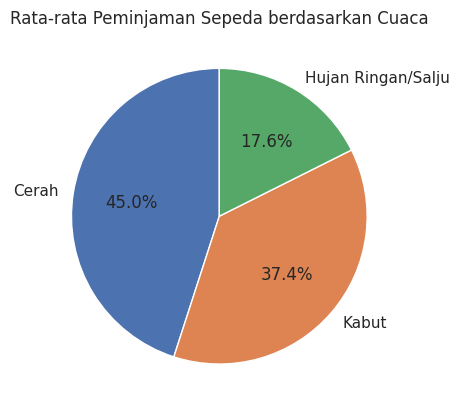

In [ ]:
#Visualisasi rata-rata peminjaman berdasarkan situasi cuaca
plt.pie(
    weather_group['average_count'],
    labels=['Cerah', 'Kabut', 'Hujan Ringan/Salju'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Rata-rata Peminjaman Sepeda berdasarkan Cuaca')
plt.show()

**Insight:**
- Berdasarkan data rata-rata peminjaman sepeda berdasarkan musim, kita dapat melihat bahwa peminjaman tertinggi terjadi pada musim gugur, sementara musim semi menunjukkan angka yang jauh lebih rendah.
- Data menunjukkan jumlah penyewaan sepeda tertinggi terjadi pada hari kerja dibandingkan dengan hari libur
- Berdasarkan data rata-rata peminjaman sepeda berdasarkan situasi cuaca, kita dapat melihat bahwa peminjaman tertinggi terjadi pada kondisi cuaca cerah









# Conclusion

### 1. Bagaimana perusahaan dapat menyesuaikan strategi pemasarannya untuk meningkatkan peminjaman sepeda pada musim yang menunjukkan angka peminjaman rendah?

Berdasarkan data rata-rata peminjaman sepeda berdasarkan musim, kita dapat melihat bahwa peminjaman tertinggi terjadi pada musim gugur, sementara musim semi menunjukkan angka yang jauh lebih rendah. Untuk mengoptimalkan peminjaman pada musim semi, perusahaan dapat meluncurkan kampanye yang menekankan keindahan dan kesegaran bersepeda di musim semi dan menggunakan media sosial untuk berbagi foto dan video pengalaman bersepeda di musim semi

###2. Bagaimana perbandingan penyewaan sepeda antara hari libur dan hari kerja?

Data menunjukkan jumlah penyewaan sepeda tertinggi terjadi pada hari kerja dengan jumlah rata-rata 4622 peminjaman dibandingkan dengan hari libur yaitu dengan jumlah rata-rata 4341 peminjaman

###3. Apakah ada perbedaan jumlah peminjam sepeda berdasarkan situasi cuaca?

Jumlah penyewaan sepeda tertinggi terjadi ketika cuaca cerah dengan kisaran 45%. Saat cuaca mendung penyewaan sepeda mengalami sedikit penurunan menjadi 37,4%. Selain itu, penyewaan sepeda berada pada level terendah yaitu 17,6% saat cuaca hujan

In [ ]:
Bike_df.to_csv("/content/drive/MyDrive/Dataset/all_data.csv", index=False)